In [148]:
## pip install pymdptoolbox, tqdm, gym
import gym
import numpy as np
import mdptoolbox, mdptoolbox.example
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time
from mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning
import pandas as pd
## credit to https://www.kaggle.com/code/benjaminschreiber/markov-decision-processes/notebook
##https://www.kaggle.com/code/arjunayyangar/assignment4-1-frozen-lake/notebook

POLICY ITERATION WITH FOREST MANAGEMENT


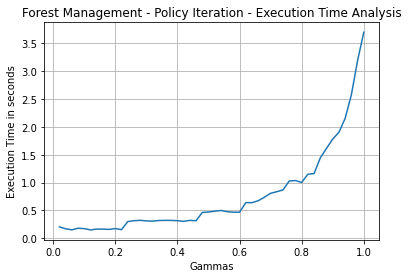

In [149]:
print('POLICY ITERATION WITH FOREST MANAGEMENT')
n = 50 
P, R = mdptoolbox.example.forest(S=2500)
value_f = [0]*n
policy = [0]*n
iters = [0]*n
time_array = [0]*n
gamma_arr = [0] * n
for i in range(0,n):
    pi = mdptoolbox.mdp.PolicyIteration(P, R, (i+0.99)/n)
    pi.run()
    gamma_arr[i]=(i+0.99)/n
    value_f[i] = np.mean(pi.V)
    policy[i] = pi.policy
    iters[i] = pi.iter
    time_array[i] = pi.time


plt.plot(gamma_arr, time_array)
plt.xlabel('Gammas')
plt.title('Forest Management - Policy Iteration - Execution Time Analysis')
plt.ylabel('Execution Time in seconds')
plt.grid()


In [249]:
def plot_simple_data(x_var, y_var, x_label, y_label, title, figure_size=(4,3)):
    plt.rcParams["figure.figsize"] = figure_size
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.plot(x_var, y_var)
    plt.show()
def make_time_array(run_stats, variables):
    cumulative_sum = 0
    times = []
    output_dict = {v:[] for v in variables}
    output_dict["times"] = times
    for result in run_stats:
        times.append(result["Time"])
        for v in result:
            if v in variables:
                output_dict[v].append(result[v])
    return output_dict

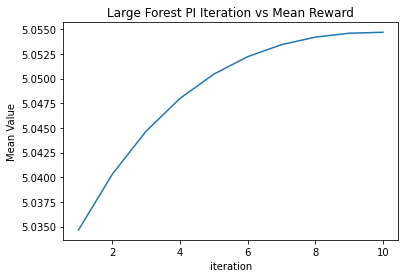

In [253]:
pi = hiive.mdptoolbox.mdp.PolicyIteration(P, R, 0.9)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "Large Forest PI Iteration vs Mean Reward", figure_size=(6,4))

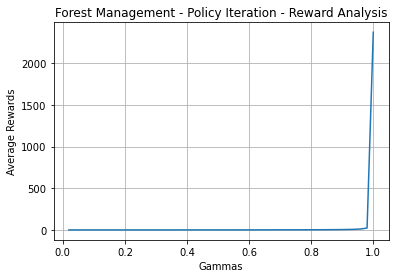

In [150]:
plt.plot(gamma_arr,value_f)
plt.xlabel('Gammas')
plt.ylabel('Average Rewards')
plt.title('Forest Management - Policy Iteration - Reward Analysis')
plt.grid()

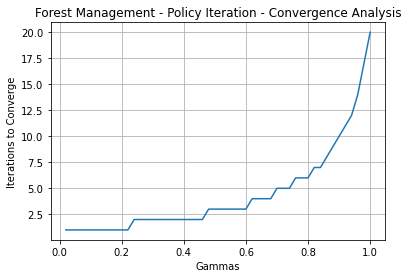

In [151]:
plt.plot(gamma_arr,iters)
plt.xlabel('Gammas')
plt.ylabel('Iterations to Converge')
plt.title('Forest Management - Policy Iteration - Convergence Analysis')
plt.grid()

VALUE ITERATION WITH FOREST MANAGEMENT


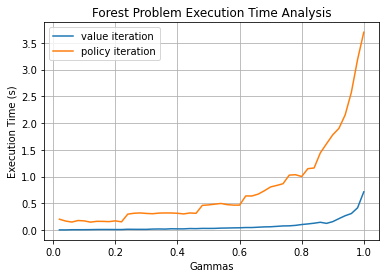

In [152]:
print('VALUE ITERATION WITH FOREST MANAGEMENT')
n = 50 
P, R = mdptoolbox.example.forest(S=2500)
value_f2 = [0]*n
policy2 = [0]*n
iters2 = [0]*n
time_array2 = [0]*n
gamma_arr2 = [0] * n
for i in range(0,n):
    pi = mdptoolbox.mdp.ValueIteration(P, R, (i+0.99)/n)
    pi.run()
    gamma_arr2[i]=(i+0.99)/n
    value_f2[i] = np.mean(pi.V)
    policy2[i] = pi.policy
    iters2[i] = pi.iter
    time_array2[i] = pi.time


plt.plot(gamma_arr2, time_array2, label = 'value iteration')
plt.plot(gamma_arr, time_array, label = 'policy iteration')

plt.xlabel('Gammas')
plt.title('Forest Problem Execution Time Analysis')
plt.ylabel('Execution Time (s)')
plt.legend()
plt.grid()

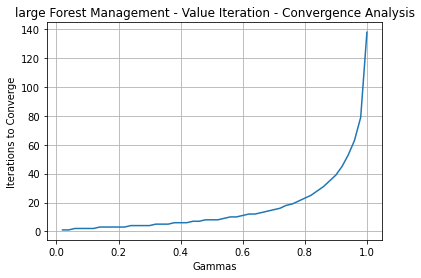

In [259]:
plt.plot(gamma_arr2,iters2)
plt.xlabel('Gammas')
plt.ylabel('Iterations to Converge')
plt.title('large Forest Management - Value Iteration - Convergence Analysis')
plt.grid()

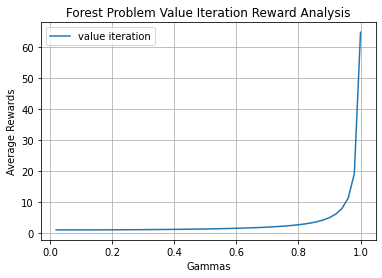

In [161]:
plt.plot(gamma_arr2,value_f2, label = 'value iteration')
plt.xlabel('Gammas')
plt.ylabel('Average Rewards')
plt.title('Forest Problem Value Iteration Reward Analysis')
plt.grid()
plt.legend()

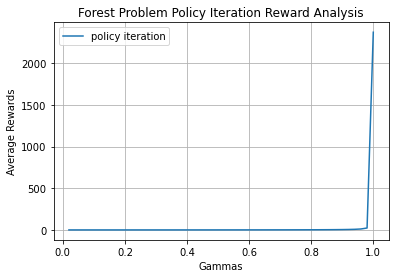

In [162]:
plt.plot(gamma_arr,value_f, label = 'policy iteration')
plt.xlabel('Gammas')
plt.ylabel('Average Rewards')
plt.title('Forest Problem Policy Iteration Reward Analysis')
plt.grid()
plt.legend()

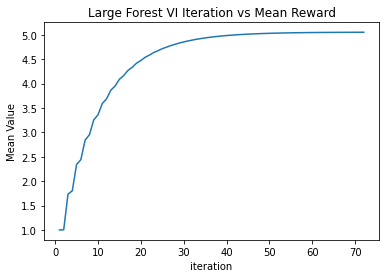

In [258]:
vi = hiive.mdptoolbox.mdp.ValueIteration(P, R, 0.9, 0.00001)
vi.run()
vi_results = make_time_array(vi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(vi_results["Mean V"])
plot_simple_data(vi_results["Iteration"], vi_results["Mean V"], 
                 "iteration", "Mean Value", "Large Forest VI Iteration vs Mean Reward", figure_size=(6,4))

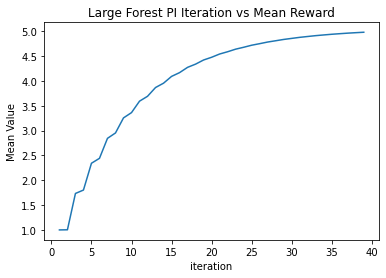

In [277]:
vi = hiive.mdptoolbox.mdp.ValueIteration(P, R, 0.9)
vi.run()
vi_results = make_time_array(vi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(vi_results["Mean V"])
plot_simple_data(vi_results["Iteration"], vi_results["Mean V"], 
                 "iteration", "Mean Value", "Large Forest PI Iteration vs Mean Reward", figure_size=(6,4))

Q_learning WITH FOREST MANAGEMENT


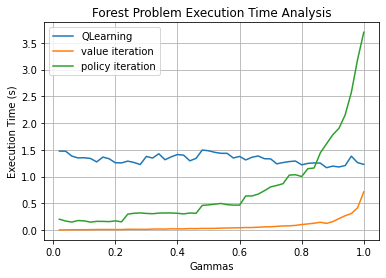

In [158]:
print('Q_learning WITH FOREST MANAGEMENT')
n = 50 
P, R = mdptoolbox.example.forest(S=2500)
value_f3 = [0]*n
policy3 = [0]*n
time_array3 = [0]*n
gamma_arr3 = [0] * n
for i in range(0,n):
    pi = mdptoolbox.mdp.QLearning(P, R, (i+0.99)/n)
    pi.run()
    gamma_arr3[i]=(i+0.99)/n
    value_f3[i] = np.mean(pi.V)
    policy3[i] = pi.policy
    time_array3[i] = pi.time

plt.plot(gamma_arr3, time_array3, label = 'QLearning')
plt.plot(gamma_arr2, time_array2, label = 'value iteration')
plt.plot(gamma_arr, time_array, label = 'policy iteration')
plt.xlabel('Gammas')
plt.title('Forest Problem Execution Time Analysis')
plt.ylabel('Execution Time (s)')
plt.legend()
plt.grid()

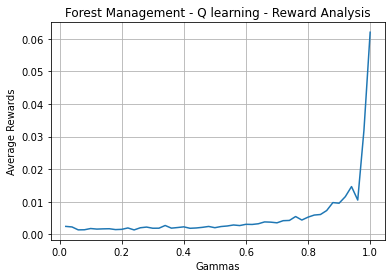

In [163]:
plt.plot(gamma_arr3,value_f3)
plt.xlabel('Gammas')
plt.ylabel('Average Rewards')
plt.title('Forest Management - Q learning - Reward Analysis')
plt.grid()

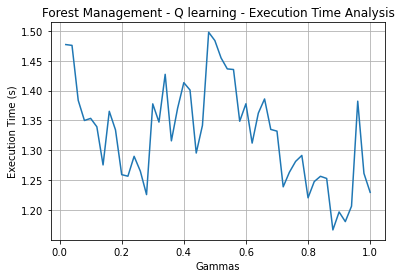

In [164]:
plt.plot(gamma_arr3, time_array3, label = 'Q Learning')
plt.xlabel('Gammas')
plt.ylabel('Execution Time (s)')
plt.title('Forest Management - Q learning - Execution Time Analysis')
plt.grid()

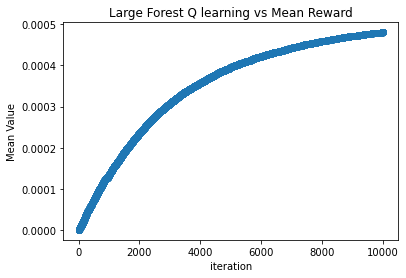

In [248]:
ql = hiive.mdptoolbox.mdp.QLearning(P, R, 0.001, 0.000000001)
ql.run()
ql_results = make_time_array(ql.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(ql_results["Mean V"])
plot_simple_data(ql_results["Iteration"], ql_results["Mean V"], 
                 "iteration", "Mean Value", "Large Forest Q learning vs Mean Reward", figure_size=(6,4))

In [170]:
from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning
def qLearning(t, r, gammas, alphas, alpha_decays=[0.99], epsilon_decays=[0.99], n_iterations=[10000000], showResults=False):
    # create data structure to save off
    columns = ['gamma', 'alpha', 'alpha_decay', 'epsilon_decay', 'iterations', 'time', 'reward', 'mean_reward', 'average_steps', 'steps_stddev', 'success_pct', 'policy', 'mean_rewards', 'max_rewards', 'error']
    numTests = len(gammas)*len(alphas)*len(alpha_decays)*len(epsilon_decays)*len(n_iterations)
    data = pd.DataFrame(0.0, index=np.arange(numTests), columns=columns)
    
    print('Gamma,\tAlpha,\tTime,\tIter,\tReward')
    print(80*'_')
    
    testNum = 0
    for g in gammas:
        for a in alphas:
            for a_decay in alpha_decays:
                for e_decay in epsilon_decays:
                    for n in n_iterations:
                        print('Test Num %d/%d' %(testNum+1, numTests))
                        print('Gamma: %.2f,\tAlpha: %.2f,\tAlpha Decay:%.3f,\tEpsilon Decay:%.3f,\tIterations:%d' 
                             %(g, a, a_decay, e_decay, n))
                        
                        test = QLearning(t, r, gamma=g, alpha=a, alpha_decay=a_decay, epsilon_decay=e_decay, n_iter=n)
                        
                        runs  = test.run()
                        time  = runs[-1]['Time']
                        iters = runs[-1]['Iteration']
                        maxR  = runs[-1]['Max V']
                        meanR = runs[-1]['Mean V']
                        
                        max_rewards, mean_rewards, errors = [], [], []
                        for run in runs:
                            max_rewards.append(run['Max V'])
                            mean_rewards.append(run['Mean V'])
                            errors.append(run['Error'])
                        
                        #policy = np.array(test.policy)
                        #policy = policy.reshape(4,4)
                        
                        data['gamma'][testNum]         = g
                        data['alpha'][testNum]         = a
                        data['alpha_decay'][testNum]   = a_decay
                        data['epsilon_decay'][testNum] = e_decay
                        data['time'][testNum]          = time
                        data['iterations'][testNum]    = iters
                        data['reward'][testNum]        = maxR
                        data['mean_reward'][testNum]   = meanR
                        data['mean_rewards'][testNum]  = {tuple(mean_rewards)}
                        data['max_rewards'][testNum]   = {tuple(max_rewards)}
                        data['error'][testNum]         = {tuple(errors)}
                        data['policy'][testNum]        = {test.policy}
                        
                        print('%.2f,\t%.2f,\t%.2f,\t%d,\t%f' % (g, a, time, iters, maxR))
                        
                        if showResults:
                            pass
                        
                        testNum = testNum + 1
            
    # See differences in policy
    policies = data['policy']
    
    '''
    for i,p in enumerate(policies):
        pol = list(p)[0]
        steps, steps_stddev, failures = get_score(env, pol, showResults)
        data['average_steps'][i] = steps
        data['steps_stddev'][i]  = steps_stddev
        data['success_pct'][i]   = 100-failures      
    '''
        
    # replace all NaN's
    data.fillna(0, inplace=True)
    data.head()
        
    return data

In [171]:
gammas         = [0.5, 0.7, 0.99]
alpha_decays   = [0.9, 0.999]
epsilon_decays = [ 0.9, 0.999]
iterations     = [10000, 20000, 100000, 200000]

ql_data  = qLearning(P, R, gammas, alphas = [0.99], alpha_decays=alpha_decays, epsilon_decays=epsilon_decays, n_iterations=iterations, showResults=False)


Gamma,	Alpha,	Time,	Iter,	Reward
________________________________________________________________________________
Test Num 1/48
Gamma: 0.50,	Alpha: 0.99,	Alpha Decay:0.900,	Epsilon Decay:0.900,	Iterations:10000


/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.50,	0.99,	2.95,	10000,	0.991080
Test Num 2/48
Gamma: 0.50,	Alpha: 0.99,	Alpha Decay:0.900,	Epsilon Decay:0.900,	Iterations:20000


/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipyke

0.50,	0.99,	5.91,	20000,	1.297052
Test Num 3/48
Gamma: 0.50,	Alpha: 0.99,	Alpha Decay:0.900,	Epsilon Decay:0.900,	Iterations:100000
0.50,	0.99,	29.07,	100000,	1.311100
Test Num 4/48
Gamma: 0.50,	Alpha: 0.99,	Alpha Decay:0.900,	Epsilon Decay:0.900,	Iterations:200000
0.50,	0.99,	53.10,	200000,	1.310411
Test Num 5/48
Gamma: 0.50,	Alpha: 0.99,	Alpha Decay:0.900,	Epsilon Decay:0.999,	Iterations:10000
0.50,	0.99,	2.91,	10000,	1.260747
Test Num 6/48
Gamma: 0.50,	Alpha: 0.99,	Alpha Decay:0.900,	Epsilon Decay:0.999,	Iterations:20000
0.50,	0.99,	5.96,	20000,	1.296551
Test Num 7/48
Gamma: 0.50,	Alpha: 0.99,	Alpha Decay:0.900,	Epsilon Decay:0.999,	Iterations:100000
0.50,	0.99,	28.78,	100000,	1.309515
Test Num 8/48
Gamma: 0.50,	Alpha: 0.99,	Alpha Decay:0.900,	Epsilon Decay:0.999,	Iterations:200000
0.50,	0.99,	52.12,	200000,	1.309448
Test Num 9/48
Gamma: 0.50,	Alpha: 0.99,	Alpha Decay:0.999,	Epsilon Decay:0.900,	Iterations:10000
0.50,	0.99,	3.15,	10000,	1.312219
Test Num 10/48
Gamma: 0.50,	Alpha: 0.

In [ ]:
ql_eps_mean_reward = pd.DataFrame(ql_data.groupby('epsilon')['mean_reward'].mean()).reset_index()
ql_eps_mean_reward
plt.plot(vi_eps_mean_reward['epsilon'],ql_eps_mean_reward['mean_reward'], label = 'Q learning')
plt.xlabel('Epsilon')
plt.ylabel('Average Rewards')
plt.title('Large forest Q learning Reward Analysis')
plt.grid()
plt.legend()

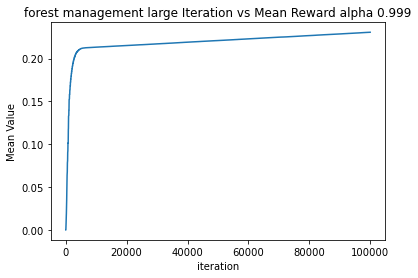

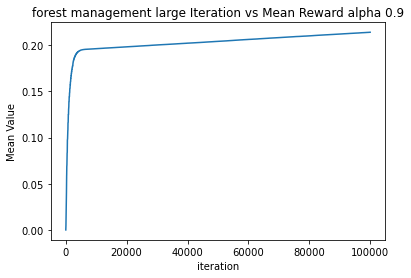

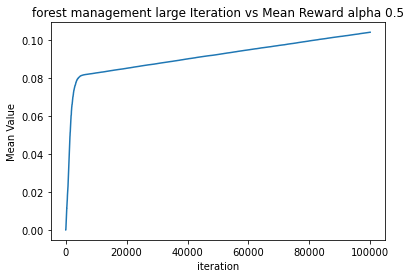

In [265]:
import hiive.mdptoolbox.mdp

pi = hiive.mdptoolbox.mdp.QLearning(P, R, 0.99, alpha = 0.99,epsilon=0.1,alpha_decay = 0.999, epsilon_decay=0.9, n_iter=100000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "forest management large Iteration vs Mean Reward alpha 0.999", figure_size=(6,4))
pi = hiive.mdptoolbox.mdp.QLearning(P, R, 0.99, alpha = 0.8,epsilon=0.1,alpha_decay = 0.999, epsilon_decay=0.9, n_iter=100000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "forest management large Iteration vs Mean Reward alpha 0.9", figure_size=(6,4))
pi = hiive.mdptoolbox.mdp.QLearning(P, R, 0.99, alpha = 0.5,epsilon=0.1,alpha_decay = 0.999, epsilon_decay=0.9, n_iter=100000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "forest management large Iteration vs Mean Reward alpha 0.5", figure_size=(6,4))


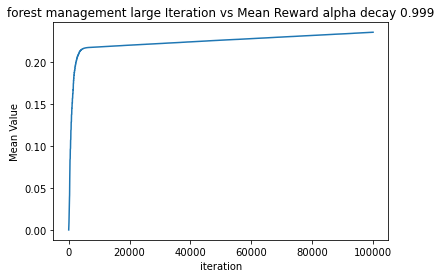

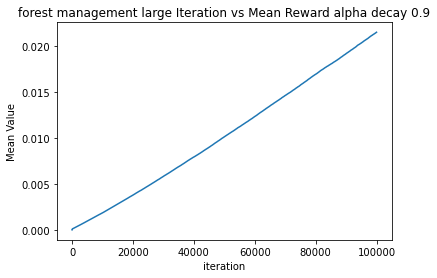

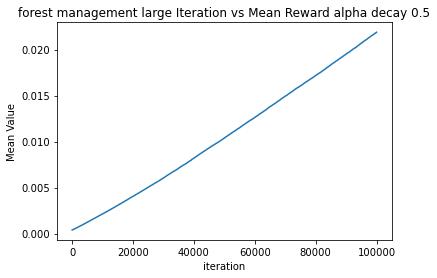

In [266]:
import hiive.mdptoolbox.mdp

pi = hiive.mdptoolbox.mdp.QLearning(P, R, 0.99, alpha = 0.99,epsilon=0.1,alpha_decay = 0.999, epsilon_decay=0.9, n_iter=100000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "forest management large Iteration vs Mean Reward alpha decay 0.999", figure_size=(6,4))
pi = hiive.mdptoolbox.mdp.QLearning(P, R, 0.99, alpha = 0.99,epsilon=0.1,alpha_decay = 0.9, epsilon_decay=0.9, n_iter=100000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "forest management large Iteration vs Mean Reward alpha decay 0.9", figure_size=(6,4))
pi = hiive.mdptoolbox.mdp.QLearning(P, R, 0.99, alpha = 0.99,epsilon=0.1,alpha_decay = 0.5, epsilon_decay=0.9, n_iter=100000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "forest management large Iteration vs Mean Reward alpha decay 0.5", figure_size=(6,4))


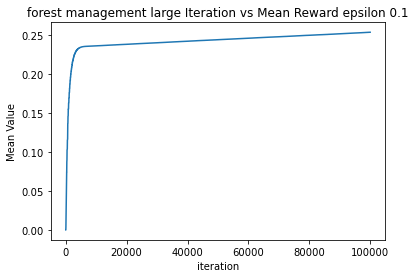

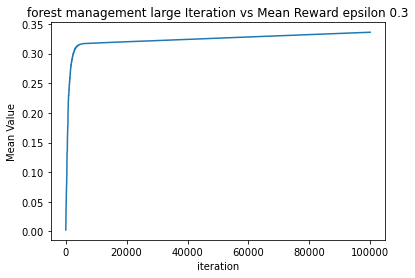

In [275]:
import hiive.mdptoolbox.mdp

pi = hiive.mdptoolbox.mdp.QLearning(P, R, 0.99, alpha = 0.99,epsilon=0.1,alpha_decay = 0.999, epsilon_decay=0.9, n_iter=100000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "forest management large Iteration vs Mean Reward epsilon 0.1", figure_size=(6,4))
pi = hiive.mdptoolbox.mdp.QLearning(P, R, 0.99, alpha = 0.99,epsilon=0.1,alpha_decay = 0.9, epsilon_decay=0.9, n_iter=100000,  skip_check=True)

pi = hiive.mdptoolbox.mdp.QLearning(P, R, 0.99, alpha = 0.99,epsilon=0.3,alpha_decay = 0.999, epsilon_decay=0.9, n_iter=100000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "forest management large Iteration vs Mean Reward epsilon 0.3", figure_size=(6,4))
pi = hiive.mdptoolbox.mdp.QLearning(P, R, 0.99, alpha = 0.99,epsilon=0.1,alpha_decay = 0.9, epsilon_decay=0.9, n_iter=100000,  skip_check=True)


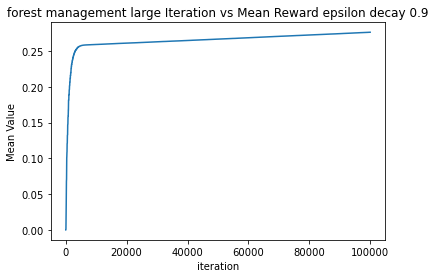

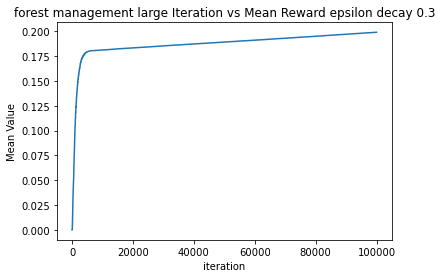

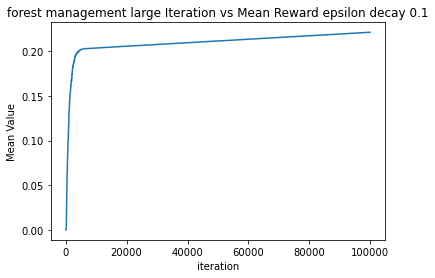

In [276]:
import hiive.mdptoolbox.mdp

pi = hiive.mdptoolbox.mdp.QLearning(P, R, 0.99, alpha = 0.99,epsilon=0.1,alpha_decay = 0.999, epsilon_decay=0.9, n_iter=100000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "forest management large Iteration vs Mean Reward epsilon decay 0.9", figure_size=(6,4))

pi = hiive.mdptoolbox.mdp.QLearning(P, R, 0.99, alpha = 0.99,epsilon=0.1,alpha_decay = 0.999, epsilon_decay=0.3, n_iter=100000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "forest management large Iteration vs Mean Reward epsilon decay 0.3", figure_size=(6,4))

pi = hiive.mdptoolbox.mdp.QLearning(P, R, 0.99, alpha = 0.99,epsilon=0.1,alpha_decay = 0.999, epsilon_decay=0.1, n_iter=100000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "forest management large Iteration vs Mean Reward epsilon decay 0.1", figure_size=(6,4))


In [ ]:
gammas         = [0.5, 0.7, 0.99]
alpha_decays   = [0.9, 0.999]
epsilon_decays = [ 0.9, 0.999]
iterations     = [10000, 20000, 100000, 200000]

ql_data  = qLearning(P, R, gammas, alphas = [0.99], alpha_decays=alpha_decays, epsilon_decays=epsilon_decays, n_iterations=iterations, showResults=False)


In [174]:
def valueIteration(t, r, gammas, epsilons, showResults=False, max_iterations=100000):
    t0 = time.time()
    
    # create data structure to save off
    columns = ['gamma', 'epsilon', 'time', 'iterations', 'reward', 'mean_reward', 'average_steps', 'steps_stddev', 'success_pct', 'policy', 'mean_rewards', 'max_rewards', 'error']
    data = pd.DataFrame(0.0, index=np.arange(len(gammas)*len(epsilons)), columns=columns)
    
    print('Gamma,\tEps,\tTime,\tIter,\tReward')
    print(80*'_')
    
    testNum = 0
    for g in gammas:
        for e in epsilons:
            test = ValueIteration(t, r, gamma=g, epsilon=e, max_iter=max_iterations)
            
            runs  = test.run()
            Time  = runs[-1]['Time']
            iters = runs[-1]['Iteration']
            maxR  = runs[-1]['Max V']
            meanR = runs[-1]['Mean V']
            
            max_rewards, mean_rewards, errors = [], [], []
            for run in runs:
                max_rewards.append(run['Max V'])
                mean_rewards.append(run['Mean V'])
                errors.append(run['Error'])
            
            policy = np.array(test.policy)
            
            data['gamma'][testNum]        = g
            data['epsilon'][testNum]      = e
            data['time'][testNum]         = Time
            data['iterations'][testNum]   = iters
            data['reward'][testNum]       = maxR
            data['mean_reward'][testNum]  = meanR
            data['mean_rewards'][testNum] = {tuple(mean_rewards)}
            data['max_rewards'][testNum]  = {tuple(max_rewards)}
            data['error'][testNum]        = {tuple(errors)}
            data['policy'][testNum]       = {test.policy}
            
            print('%.2f,\t%.0E,\t%.2f,\t%d,\t%f' % (g, e, Time, iters, maxR))
            
            testNum = testNum + 1
        
    endTime = time.time() - t0
    print('Time taken: %.2f' % endTime)
    
    # See differences in policy
    policies = data['policy']
    
    # replace all NaN's
    data.fillna(0, inplace=True)
    data.head()
        
    return data

In [271]:
from hiive.mdptoolbox.mdp import ValueIteration

gammas   = [0.1, 0.3, 0.6, 0.8, 0.9, 0.99]
epsilons = [1e-2, 1e-3, 1e-8, 1e-12]
vi_data  = valueIteration(P, R, gammas, epsilons, showResults=False)


Gamma,	Eps,	Time,	Iter,	Reward
________________________________________________________________________________
0.10,	1E-02,	0.01,	2,	4.360000


/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipyke

0.10,	1E-03,	0.01,	3,	4.393300
0.10,	1E-08,	0.03,	8,	4.396613
0.10,	1E-12,	0.05,	12,	4.396613
0.30,	1E-02,	0.02,	4,	5.460862
0.30,	1E-03,	0.02,	6,	5.489575
0.30,	1E-08,	0.07,	15,	5.491933
0.30,	1E-12,	0.11,	22,	5.491933
0.60,	1E-02,	0.05,	11,	8.797055
0.60,	1E-03,	0.07,	15,	8.808703
0.60,	1E-08,	0.17,	33,	8.809994
0.60,	1E-12,	0.25,	48,	8.809994
0.80,	1E-02,	0.11,	23,	14.863209
0.80,	1E-03,	0.15,	30,	14.880132
0.80,	1E-08,	0.36,	65,	14.883720
0.80,	1E-12,	0.50,	93,	14.883721
0.90,	1E-02,	0.20,	39,	23.089675
0.90,	1E-03,	0.25,	50,	23.147532
0.90,	1E-08,	0.58,	105,	23.172360
0.90,	1E-12,	0.82,	149,	23.172433
0.99,	1E-02,	0.50,	92,	60.701641
0.99,	1E-03,	0.60,	112,	64.123878
0.99,	1E-08,	1.22,	212,	73.867071
0.99,	1E-12,	1.62,	292,	76.974951
Time taken: 11.29


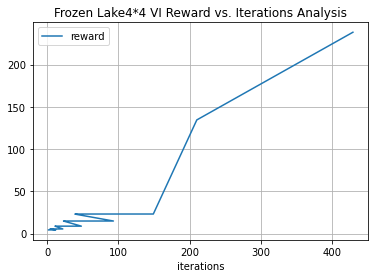

In [177]:
vi_data.plot(x='iterations', y='reward', title="Frozen Lake4*4 VI Reward vs. Iterations Analysis")
plt.grid(True)

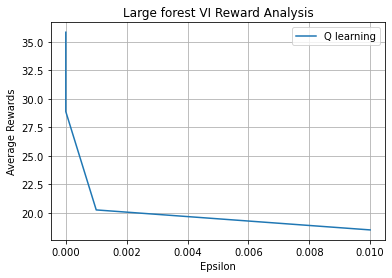

In [217]:
vi_eps_mean_reward = pd.DataFrame(vi_data.groupby('epsilon')['mean_reward'].mean()).reset_index()
vi_eps_mean_reward
plt.plot(vi_eps_mean_reward['epsilon'],vi_eps_mean_reward['mean_reward'], label = 'Q learning')
plt.xlabel('Epsilon')
plt.ylabel('Average Rewards')
plt.title('Large forest VI Reward Analysis')
plt.grid()
plt.legend()

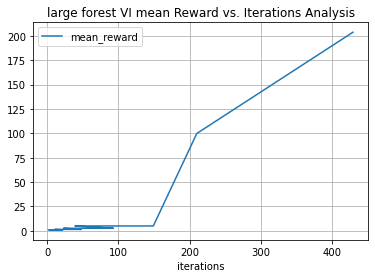

In [180]:
vi_data.plot(x='iterations', y='mean_reward', title="large forest VI mean Reward vs. Iterations Analysis")
plt.grid(True)

In [181]:
from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning
def policyIteration(t, r, gammas, showResults=False, max_iterations=100000):
    t0 = time.time()
    
    # create data structure to save off
    columns = ['gamma', 'epsilon', 'time', 'iterations', 'reward', 'mean_reward', 'average_steps', 'steps_stddev', 'success_pct', 'policy', 'mean_rewards', 'max_rewards', 'error']
    data = pd.DataFrame(0.0, index=np.arange(len(gammas)), columns=columns)
    
    print('gamma,\ttime,\titer,\treward')
    print(80*'_')
    
    testnum = 0
    for g in gammas:
        test = PolicyIteration(t, r, gamma=g, max_iter=max_iterations, eval_type="matrix") # eval_type="iterative"
        
        runs  = test.run()
        Time  = test.time
        iters = test.iter
        maxr  = runs[-1]['Max V']
        meanR = runs[-1]['Mean V']
                
        max_rewards, mean_rewards, errors = [], [], []
        for run in runs:
            max_rewards.append(run['Max V'])
            mean_rewards.append(run['Mean V'])
            errors.append(run['Error'])
        
        data['gamma'][testnum]        = g
        data['time'][testnum]         = Time
        data['iterations'][testnum]   = iters
        data['reward'][testnum]       = maxr
        data['mean_reward'][testnum]  = meanR
        data['mean_rewards'][testnum] = {tuple(mean_rewards)}
        data['max_rewards'][testnum]  = {tuple(max_rewards)}
        data['error'][testnum]        = {tuple(errors)}
        data['policy'][testnum]       = {test.policy}
        
        print('%.2f,\t%.2f,\t%d,\t%f' % (g, Time, iters, maxr))
        
        if showResults:
            plot_forest(policy, title)
            pass
        
        testnum = testnum + 1
        
    endTime = time.time() - t0
    print('Time taken: %.2f' % endTime)
    
    # see differences in policy
    policies = data['policy']
        
    # replace all nan's
    data.fillna(0, inplace=True)
    data.head()
        
    return data

In [272]:
gammas   = [0.1, 0.3, 0.45, 0.6, 0.7, 0.8, 0.9, 0.99] 
pi_data  = policyIteration(P, R, gammas, showResults=False)


gamma,	time,	iter,	reward
________________________________________________________________________________
0.10,	0.16,	1,	4.396613


/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipyke

0.30,	0.32,	2,	5.491933
0.45,	0.32,	2,	6.762327
0.60,	0.48,	3,	8.809994
0.70,	0.79,	5,	11.054551
0.80,	0.97,	6,	14.883721
0.90,	1.62,	10,	23.172434
0.99,	3.09,	18,	79.492429
Time taken: 7.95


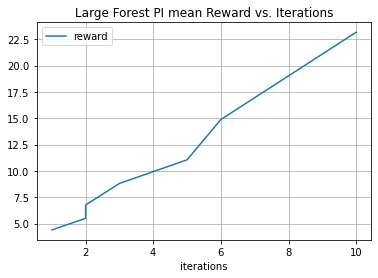

In [207]:
pi_data.plot(x='iterations', y='reward', title="Large Forest PI mean Reward vs. Iterations")
plt.grid(True)

In [209]:
def make_time_array(run_stats, variables):
    cumulative_sum = 0
    times = []
    output_dict = {v:[] for v in variables}
    output_dict["times"] = times
    for result in run_stats:
        times.append(result["Time"])
        for v in result:
            if v in variables:
                output_dict[v].append(result[v])
    return output_dict
def plot_simple_data(x_var, y_var, x_label, y_label, title, figure_size=(4,3)):
    plt.rcParams["figure.figsize"] = figure_size
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.plot(x_var, y_var,)
    plt.show()

In [273]:
# find the highest score for pi
bestRun_pi = pi_data['reward'].max()
print('best reward: %d' % bestRun_pi)
# find the highest score for vi
bestRun_vi = vi_data['reward'].max()
print('best reward: %d' % bestRun_vi)
# find the highest score for ql
bestRun_ql = ql_data['reward'].max()
print('best reward: %d' % bestRun_ql)

best reward: 79
best reward: 76
best reward: 48
